In [11]:
#Motivation: https://github.com/rslim087a/PyTorch-for-Deep-Learning-and-Computer-Vision-Course-All-Codes-
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets
from IPython import display

In [12]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(n_pts, -1))

In [13]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

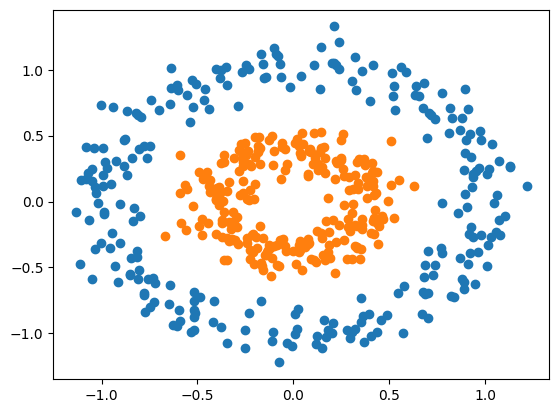

In [14]:
scatter_plot()

In [15]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.model = nn.Sequential(
                        nn.Linear(input_size, hidden_size),
                        nn.Sigmoid(),
                        nn.Linear(hidden_size, output_size),
                        nn.Sigmoid()
                    )
        
    def forward(self, x):
        return self.model(x)

    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [16]:
torch.manual_seed(1)
model = Model(2, 10, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.3643, -0.3121],
        [-0.1371,  0.3319],
        [-0.6657,  0.4241],
        [-0.1455,  0.3597],
        [ 0.0983, -0.0866],
        [ 0.1961,  0.0349],
        [ 0.2583, -0.2756],
        [-0.0516, -0.0637],
        [ 0.1025, -0.0028],
        [ 0.6181,  0.2200]], requires_grad=True), Parameter containing:
tensor([-0.2633, -0.4271, -0.1185, -0.3050, -0.2266,  0.0339,  0.4215,  0.3843,
        -0.6912,  0.4384], requires_grad=True), Parameter containing:
tensor([[ 0.0883,  0.3000,  0.2087, -0.2881, -0.3007, -0.1525,  0.2777, -0.0527,
          0.1353, -0.1470]], requires_grad=True), Parameter containing:
tensor([0.3103], requires_grad=True)]


In [17]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [18]:
def plot_dec_boundary(X, y, title=None):
    plt.title(title)
    x_span = np.linspace(min(X[:, 0]), max(X[:,0]))
    y_span = np.linspace(min(X[:, 1]), max(X[:,1]))
    xx, yy = np.meshgrid(x_span, y_span)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contour(xx, yy, z)

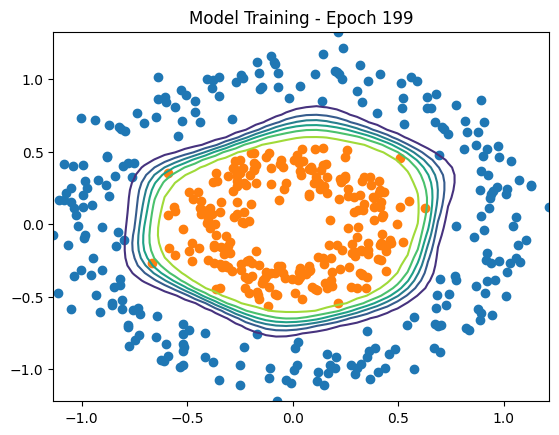

In [19]:
epochs = 200
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    #print("epoch: {} loss: {}".format(i, loss.item()))
    losses.append(loss.detach().numpy())
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    plot_dec_boundary(X, y, 'Model Training - Epoch {}'.format(i))
    scatter_plot()
    plt.show()
    display.clear_output(wait=True)

Text(0, 0.5, 'loss')

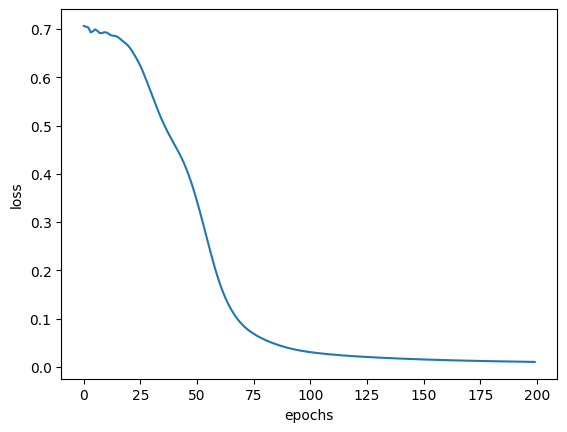

In [20]:
plt.plot(range(epochs), losses)
plt.xlabel('epochs')
plt.ylabel('loss')